Notebook to match thalweg and surface plot ends

# Preliminaries

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np

from salishsea_tools import teos_tools, viz_tools
from salishsea_tools import visualisations as vis
%matplotlib inline

In [2]:
date = '20170908'
datem = '08sep17'

In [20]:
mesh_mask = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
tmask = 1 - mesh_mask.variables['tmask'][0]
mesh_mask_depth_var='gdept_0'
depth = mesh_mask.variables[mesh_mask_depth_var][:]

In [4]:
grid = NC.Dataset(
    '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathymetry_201702.nc',
    'r')
bathy = grid.variables['Bathymetry'][:, :]
lats = grid.variables['nav_lat'][:]
lons = grid.variables['nav_lon'][:]

In [5]:
nowcast_loc = '/results/SalishSea/nowcast-green/'
file_core = 'SalishSea_1h_'
timecount = 7

## Thalweg

In [13]:
thalweg_file='../../../../Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

# Salinity Plots

In [7]:
filename = nowcast_loc + '/' + datem + '/' + file_core + date + '_' + date + '_grid_T.nc'
print(filename)
fT = NC.Dataset(filename, 'r')
sal = fT.variables['vosaline'][timecount]
fT.close()
sal_masked = np.ma.array(sal, mask=tmask)

/results/SalishSea/nowcast-green//08sep17/SalishSea_1h_20170908_20170908_grid_T.nc


## Plan View

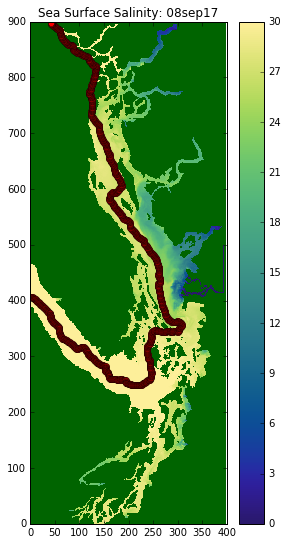

In [17]:
vmax = 30; vmin = 0
fig, ax = plt.subplots(1, 1, figsize=(4.5, 9), sharey=True)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('darkgreen')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal_masked[0], cmap=cmap, vmax=vmax, vmin=vmin)
ax.set_title("Sea Surface Salinity: "+datem)
cbar = fig.colorbar(mesh, ax=ax)
ax.plot(thalweg_pts[:, 1], thalweg_pts[:, 0], 'or')

## Thalweg

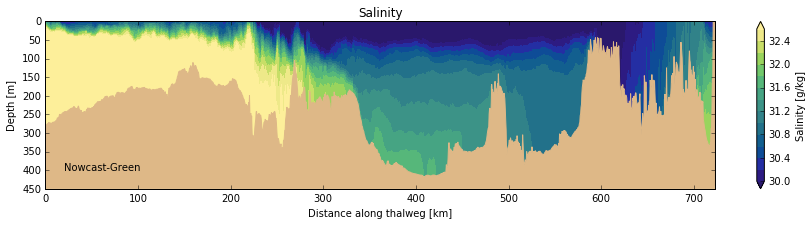

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
cmap = plt.get_cmap(cm.haline)
cbar = vis.contour_thalweg(
    ax,
    sal,
    grid,
    mesh_mask,
    np.arange(30, 32.6, 0.2),
    cmap=cmap)
ax.set_ylim([450,0])
cbar.set_label('Salinity [g/kg]')
ax.text(20, 400, 'Nowcast-Green')
ax.set_title('Salinity');

In [26]:
dep_thal, distance, var_thal = vis.load_thalweg(
        depth[0, ...], sal, grid['nav_lon'][:], grid['nav_lat'][:],
        thalweg_pts)

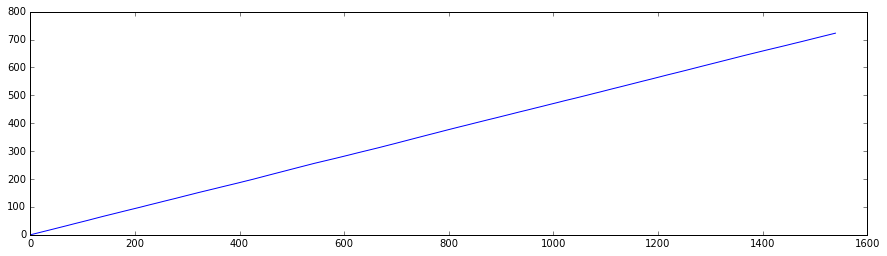

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(distance[0])

In [33]:
# from untubu on stackoverflow
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [51]:
north_distance = 632.
index, value = find_nearest(distance[0], north_distance)
print (index, value, thalweg_pts[index])
north_limit = thalweg_pts[index, 0]

1343 632.170138182 [799 130]


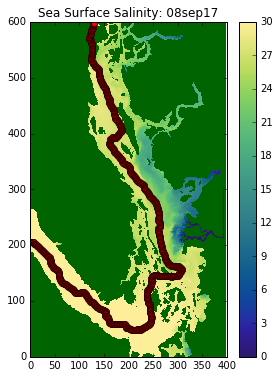

In [52]:
vmax = 30; vmin = 0; south_limit=200
fig, ax = plt.subplots(1, 1, figsize=(4.5, 6), sharey=True)
cmap = plt.get_cmap(cm.haline)
cmap.set_bad('darkgreen')
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(sal_masked[0, south_limit:north_limit], cmap=cmap, vmax=vmax, vmin=vmin)
ax.set_title("Sea Surface Salinity: "+datem)
cbar = fig.colorbar(mesh, ax=ax)
ax.plot(thalweg_pts[:index, 1], thalweg_pts[:index, 0] - south_limit, 'or')

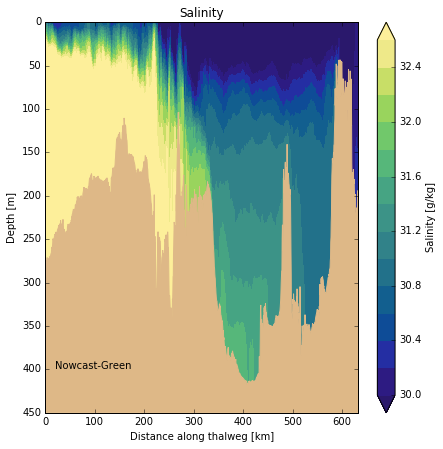

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
cmap = plt.get_cmap(cm.haline)
cbar = vis.contour_thalweg(
    ax,
    sal,
    grid,
    mesh_mask,
    np.arange(30, 32.6, 0.2),
    cmap=cmap)
ax.set_ylim([450,0])
ax.set_xlim([0, north_distance])
cbar.set_label('Salinity [g/kg]')
ax.text(20, 400, 'Nowcast-Green')
ax.set_title('Salinity');